In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

haberman = pd.read_csv("haberman.csv")


In [2]:
print (haberman.shape)

(306, 4)


In [3]:
print (haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [4]:
haberman["status"].value_counts()

#Observations
#Count of people that survived cancer are 225 and the ones who died are 81.
#Dataset is imbalanced

1    225
2     81
Name: status, dtype: int64

In [13]:
survived=haberman.loc[haberman["status"]==1]
died=haberman.loc[haberman["status"]==2]
print("patientssurviveddata")
print(survived.describe())
print("patientsdieddata")
print(died.describe())

#Observations for Survived patients
#Number of people survived : 225
#average age of people that survived : 52
#min age of people that survived : 30
#max age of people that survived : 77

#Observations for patients who died

#Number of people who died : 81
#average age of people who died : 53
#min age of people who died : 34
#max age of people who died : 83

patientssurviveddata
              age        year       nodes  status
count  225.000000  225.000000  225.000000   225.0
mean    52.017778   62.862222    2.791111     1.0
std     11.012154    3.222915    5.870318     0.0
min     30.000000   58.000000    0.000000     1.0
25%     43.000000   60.000000    0.000000     1.0
50%     52.000000   63.000000    0.000000     1.0
75%     60.000000   66.000000    3.000000     1.0
max     77.000000   69.000000   46.000000     1.0
patientsdieddata
             age       year      nodes  status
count  81.000000  81.000000  81.000000    81.0
mean   53.679012  62.827160   7.456790     2.0
std    10.167137   3.342118   9.185654     0.0
min    34.000000  58.000000   0.000000     2.0
25%    46.000000  59.000000   1.000000     2.0
50%    53.000000  63.000000   4.000000     2.0
75%    61.000000  65.000000  11.000000     2.0
max    83.000000  69.000000  52.000000     2.0


[]

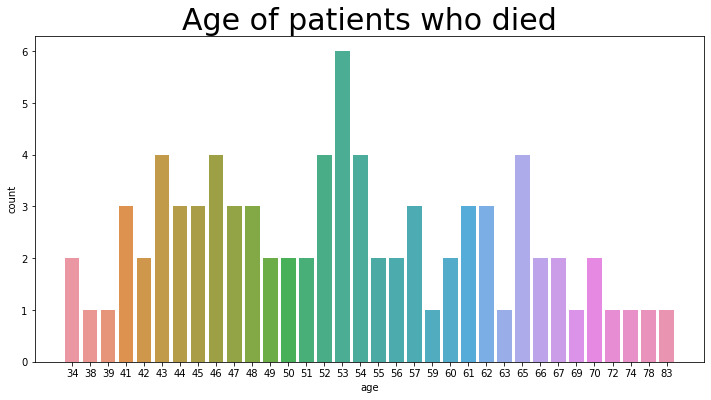

In [30]:
plt.figure(figsize=(12,6))
sns.countplot(x='age',data=died)
plt.title("Age of patients who died",size=30)
plt.plot()

#Observations
#Max patients that died were of age 53
#Most no of cancer deaths were in patients of age 52-54"




[]

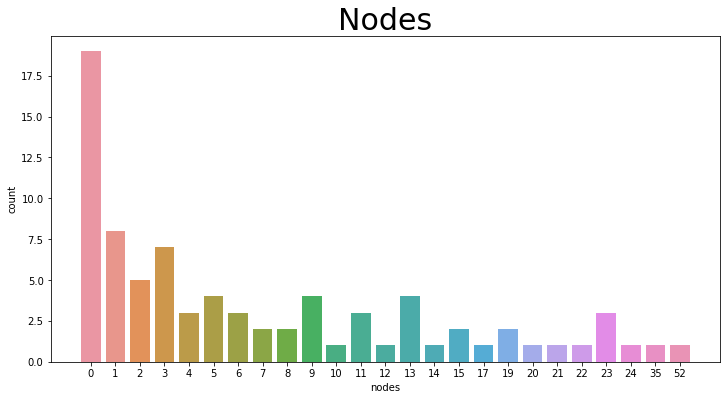

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(x='nodes',data=died)
plt.title("Nodes",size=30)
plt.plot()

#Observations
#Patients who died had nodes from 0 to 24
#Max pateints who died had nodes 0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


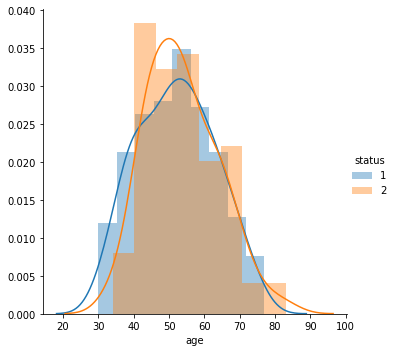

In [18]:
#Univariate Analysis

sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

# Patients with age 40-65 have survived the most.
# Patients with age 52-54 have died the most



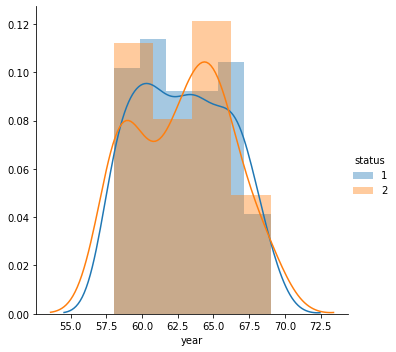

In [19]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();

#Operation year 1960 had highest survival rate.
#Operation year having range 1963-1966 had lowest survival rate.

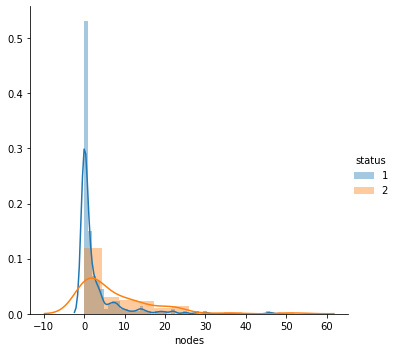

In [20]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();

#Node 0 has the highest survival rate

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


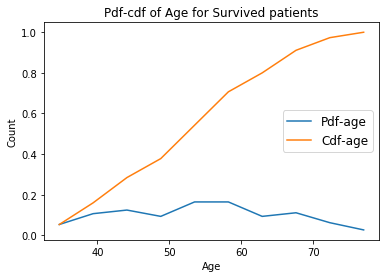

In [23]:
counts, bin_edges = np.histogram(survived["age"], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.xlabel('Age')
plt.ylabel("Count")
plt.title('Pdf-cdf of Age for Survived patients')
plt.legend(['Pdf-age', 'Cdf-age'], loc = 5,prop={'size': 12})


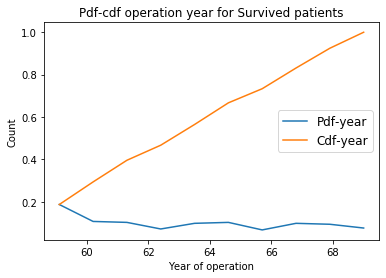

In [22]:
counts, bin_edges = np.histogram(survived["year"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:],cdf)
plt.xlabel('Year of operation')
plt.ylabel("Count")
plt.title('Pdf-cdf operation year for Survived patients')
plt.legend(['Pdf-year', 'Cdf-year'], loc = 5,prop={'size': 12})

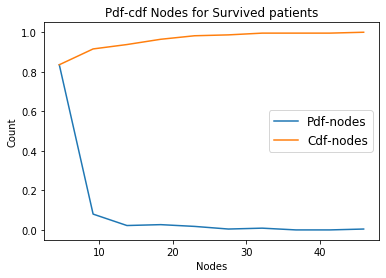

In [24]:
counts, bin_edges = np.histogram(survived["nodes"], bins=10, density = True)
pdf = counts/(sum(counts))
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:],cdf)
plt.xlabel('Nodes')
plt.ylabel("Count")
plt.title('Pdf-cdf Nodes for Survived patients')
plt.legend(['Pdf-nodes', 'Cdf-nodes'], loc = 5,prop={'size': 12})
plt.show();

# There are 90% of Patients, all of whom have Auxillary Nodes <= 10

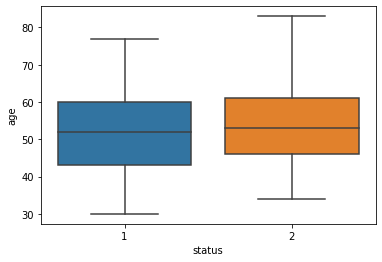

In [25]:

sns.boxplot(x='status',y='age', data=haberman)
plt.show()

#From box plot 1,patients of age range 30-34 survived after the treatment.
#Patients with age > 77 were not able to survive.

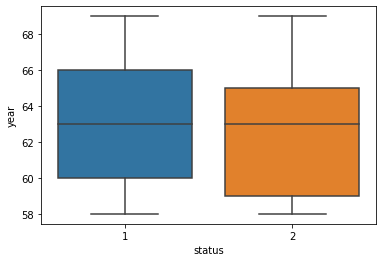

In [26]:
sns.boxplot(x='status',y='year', data=haberman)
plt.show()

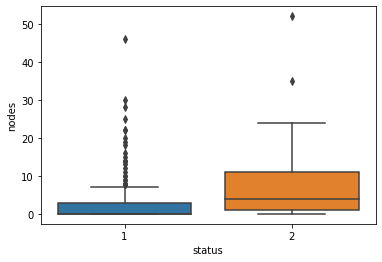

In [27]:
sns.boxplot(x='status',y='nodes', data=haberman)
plt.show()

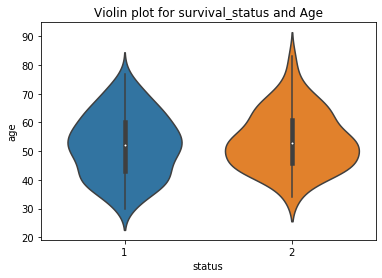

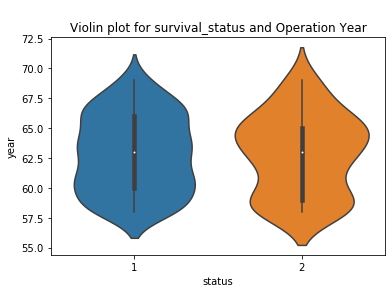

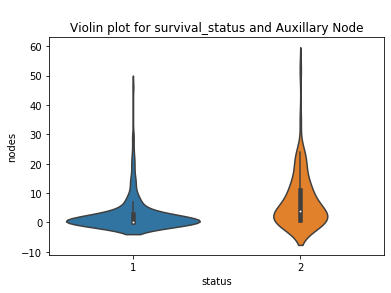

In [28]:
sns.violinplot(x = 'status', y = 'age', data = haberman)
plt.title("Violin plot for survival_status and Age")
plt.show()

sns.violinplot(x = 'status', y = 'year', data = haberman)
plt.title("\nViolin plot for survival_status and Operation Year")
plt.show()

sns.violinplot(x = 'status', y = 'nodes', data = haberman)
plt.title("\nViolin plot for survival_status and Auxillary Node")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


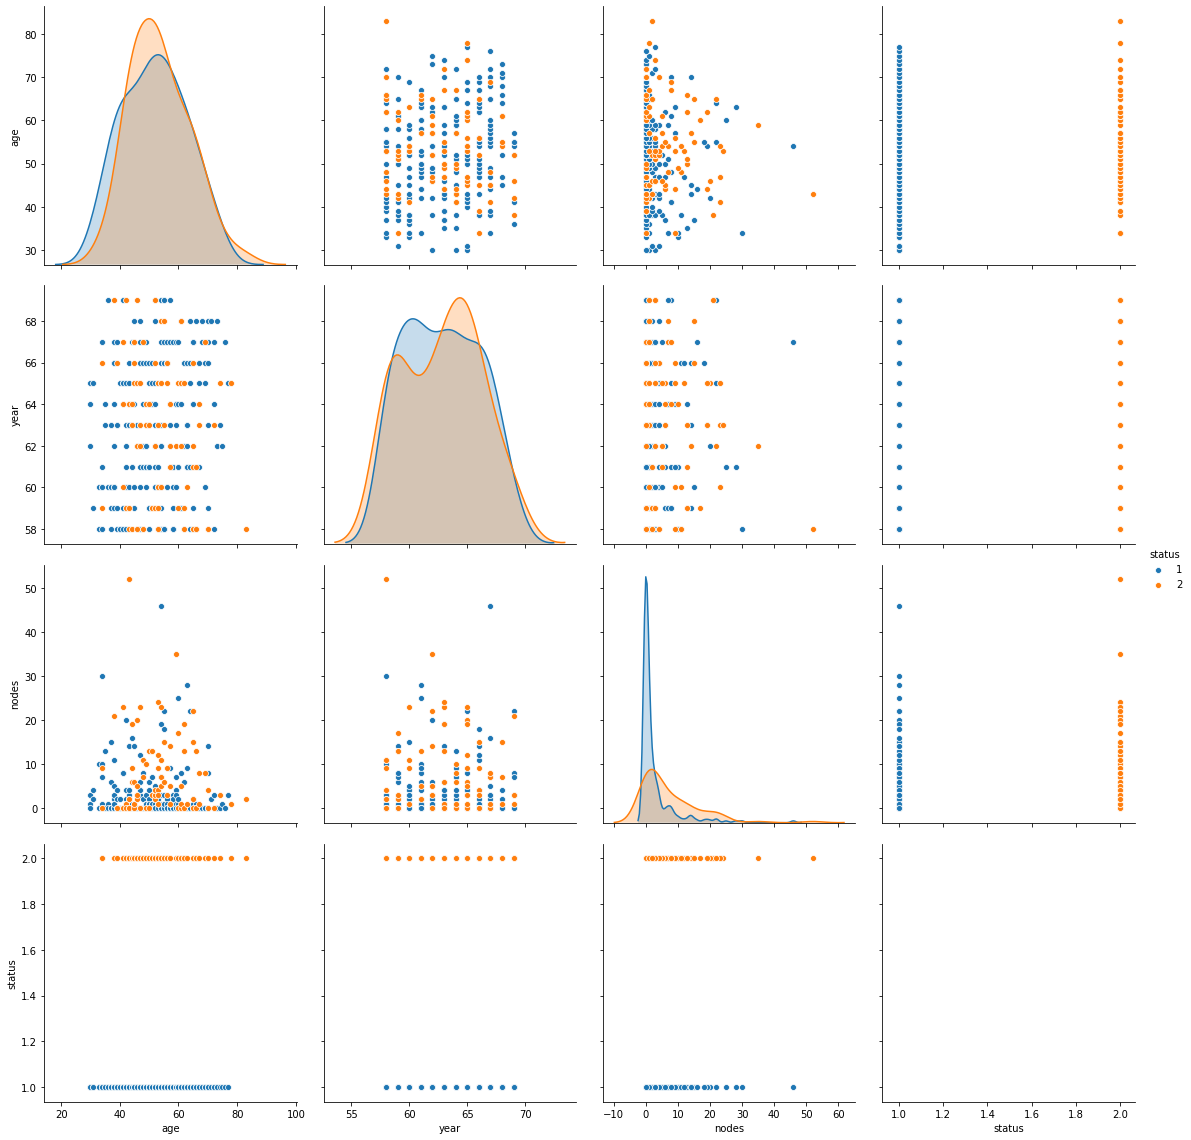

In [29]:
sns.pairplot(haberman, hue='status', size=4)
plt.show()

#Observations
# Pair Plots are not Linearly Separable.

In [ ]:
Conclusion
women in the age range of 45 to 60 are suffering from breast cancer.
Patients who died had nodes from 0 to 24
long survival is more from age range 47–60 and axillary nodes from 0–3.